# Problem Statement
\

In [6]:
#installing and importing required libraries
!pip install xgboost


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from xgboost import XGBRegressor

In [18]:
#importing dataset for ananlysis
df = pd.read_csv('Walmart .csv',encoding = ('ISO-8859-1'))

In [19]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [21]:
df.shape

(6435, 8)

In [22]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [23]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

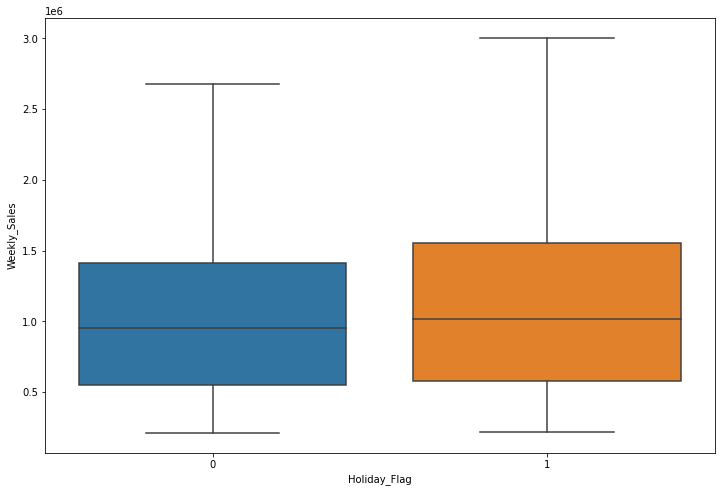

In [24]:
#lets plot some graphs
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Holiday_Flag', y = 'Weekly_Sales', data = df,showfliers = False)

In [25]:
df.keys()

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

<AxesSubplot:>

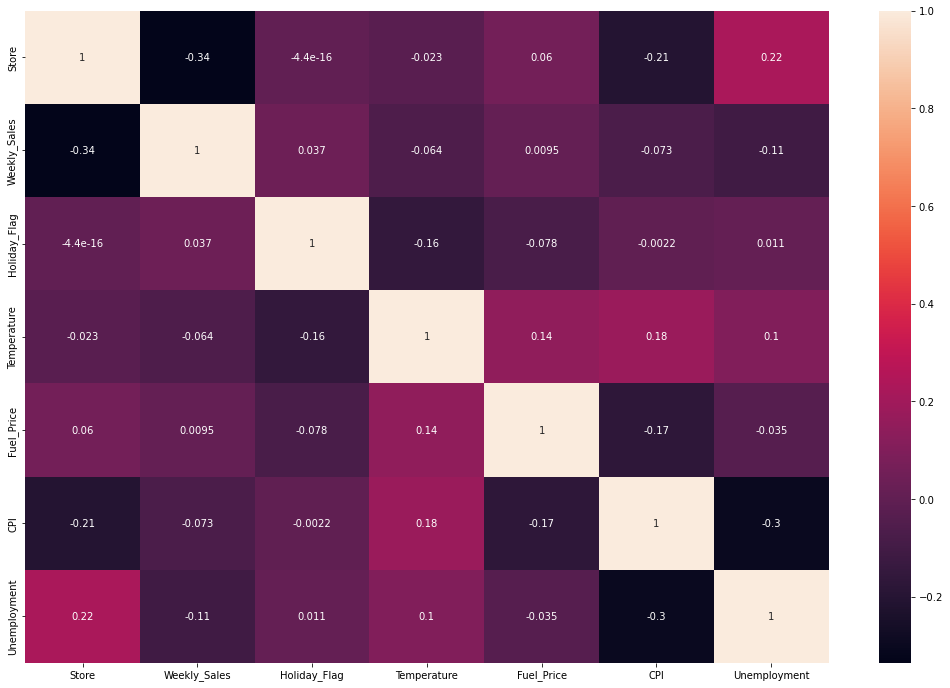

In [26]:
#lets check the correlation between all the numerical features using heatmap.
feature_cols = ['Store','Date','Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']
plt.figure(figsize = (18,12))
sns.heatmap(df[feature_cols].corr(), annot = True)

In [27]:
print('Min Date in Data is -{}'.format(df['Date'].min()))
print('Max Date in Data is -{}'.format(df['Date'].max()))

Min Date in Data is -01-04-2011
Max Date in Data is -31-12-2010


In [28]:
features_num = df.columns.tolist()
features_num = [i for i in features_num if i not in ['Date','Weekly_Sales']]

features_num

['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Conclusion of EDA

In [29]:
standard_scaler = StandardScaler()
transformed_features = standard_scaler.fit_transform(df[features_num])

In [30]:
#As we know Date is object data type so we convert it into datetime
df['Date'] = pd.to_datetime(df['Date'])
df['month_date'] = df['Date'].apply(lambda i : i.month)
df['day_date'] = df['Date'].apply(lambda i : i.day)
df['year_date'] = df['Date'].apply(lambda i : i.year)

C:\Users\MUKUND\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\MUKUND\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\MUKUND\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\MUKUND\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or sp

In [31]:
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  month_date  day_date  year_date  
0     211.096358         8.106           5         2       2010  
1     211.242170         8.106          12         2       2010  
2     211.289143         8.106           2        19       2010  
3     211.319643         8.106           2        26       2010  
4     211.350143         8.106           5         3       2010  
...          ...           ...         ...       ...        ...  
6430  192.013558         8.684           9        28       2012  
6431  192.170412         8.667           5        10       2012  
6432  192.327265         8.667          12        10       2012  
6433  192.330854         8.667          10        19       2012  
6434  192.308899         8.667          10        26       2012  

[6435 rows x 11 columns]

In [32]:
df[features_num] = transformed_features

In [33]:
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
0    -1.693979 2010-05-02    1643690.90     -0.274204    -0.995136   
1    -1.693979 2010-12-02    1641957.44      3.646917    -1.201170   
2    -1.693979 2010-02-19    1611968.17     -0.274204    -1.124178   
3    -1.693979 2010-02-26    1409727.59     -0.274204    -0.760907   
4    -1.693979 2010-05-03    1554806.68     -0.274204    -0.767955   
...        ...        ...           ...           ...          ...   
6430  1.693979 2012-09-28     713173.95     -0.274204     0.228602   
6431  1.693979 2012-05-10     733455.07     -0.274204     0.229144   
6432  1.693979 2012-12-10     734464.36     -0.274204    -0.335825   
6433  1.693979 2012-10-19     718125.53     -0.274204    -0.227385   
6434  1.693979 2012-10-26     760281.43     -0.274204    -0.098343   

      Fuel_Price       CPI  Unemployment  month_date  day_date  year_date  
0      -1.713800  1.004175      0.056964           5         2       2010  
1      -1.766089  1.007880      0.056964          12         2       2010  
2      -1.840166  1.009074      0.056964           2        19       2010  
3      -1.737766  1.009849      0.056964           2        26       2010  
4      -1.598328  1.010624      0.056964           5         3       2010  
...          ...       ...           ...         ...       ...        ...  
6430    1.390883  0.519270      0.365109           9        28       2012  
6431    1.364738  0.523256      0.356046           5        10       2012  
6432    1.397419  0.527241      0.356046          12        10       2012  
6433    1.329879  0.527332      0.356046          10        19       2012  
6434    1.140330  0.526775      0.356046          10        26       2012  

[6435 rows x 11 columns]

In [34]:
#split data into traini0ng data and testing data
feature_cols = df.columns.tolist()
feature_cols = [i for i in feature_cols if i not in ['Date','Weekly_Sales']]
x_train,x_test,y_train,y_test = train_test_split(df[feature_cols],df['Weekly_Sales'],test_size = 0.2,random_state =1234)

# Developing the ML models

# KNN

In [35]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors = 20, n_jobs = 4)
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {knn_regressor.score(x_test, y_test)}')

MAE is - 438002.2962498057
RMSE is - 516668.4662414762
Accuracy Score is - 0.10985696142125201


<AxesSubplot:xlabel='Weekly_Sales'>

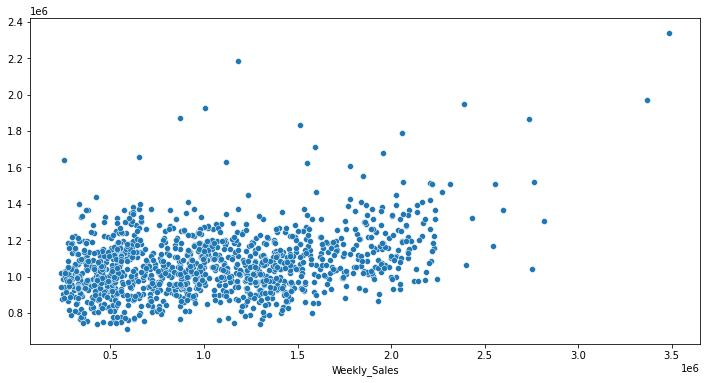

In [36]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

# Decision Tree

In [37]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 1234)
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {decision_tree_regressor.score(x_test, y_test)}')

MAE is - 76189.61445998446
RMSE is - 144077.89930172815
Accuracy Score is - 0.9307801549215738


<AxesSubplot:xlabel='Weekly_Sales'>

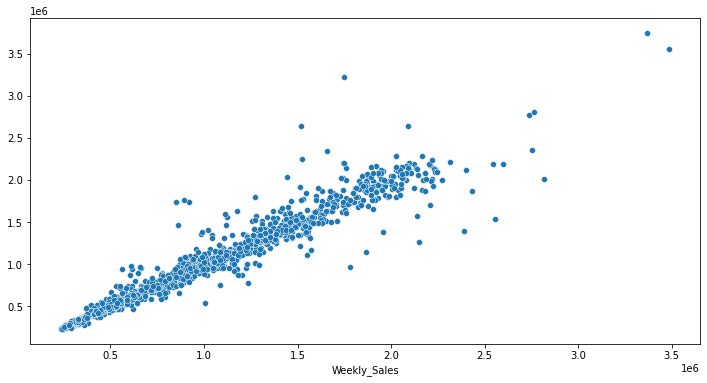

In [38]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

# Random Forest

In [39]:
rf_regressor = RandomForestRegressor(n_estimators = 400, max_depth = 15, random_state = 1234, n_jobs = 5)
rf_regressor.fit(x_train, y_train)
y_pred = rf_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {rf_regressor.score(x_test, y_test)}')

MAE is - 60127.249368319586
RMSE is - 106926.15242423194
Accuracy Score is - 0.9618755342161982


<AxesSubplot:xlabel='Weekly_Sales'>

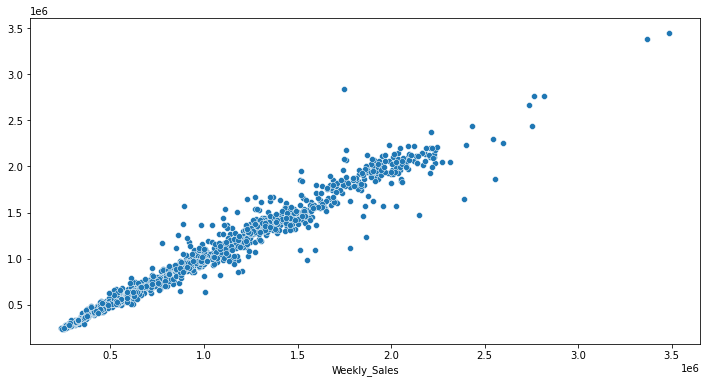

In [40]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

# XGBoost

In [41]:
xgb_regressor = XGBRegressor(objective = 'reg:linear', n_estimators = 500, max_depth = 6, nthread = 4, learning_rate = 0.5, random_state = 1234)
xgb_regressor.fit(x_train, y_train)
y_pred = xgb_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Accuracy Score is - {xgb_regressor.score(x_test, y_test)}')

[11:37:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MAE is - 54673.96059052059
RMSE is - 87678.0252890862
Accuracy Score is - 0.9743659393565842


<AxesSubplot:xlabel='Weekly_Sales'>

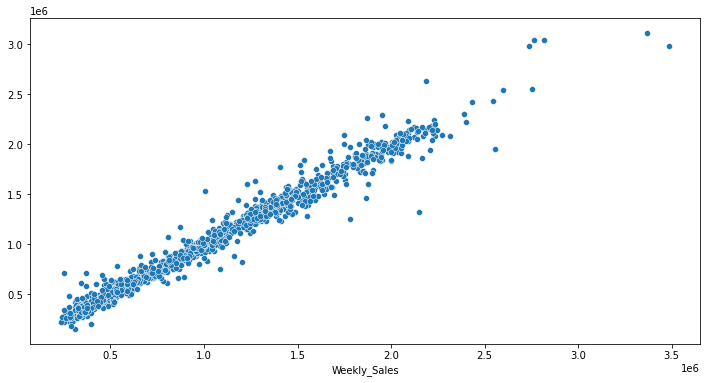

In [42]:
# scatter plot between observed and predicted values of weekly sales from XGBoost regressor
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

In [43]:
writer = pd.ExcelWriter('capstonee.xlsx', engine='xlsxwriter')

# Write dataframe to new sheet
df.to_excel(writer, sheet_name='AnotherSheet')

# Close the Pandas Excel writer and output the Excel file.
writer.save()